# Linear Regression

The simplest possible relationship between two variables is a linear relationship

$$y_i \approx \beta_0 + \beta_1x_i$$

Generally, a linear model makes a prediction by simply computing a weighted sum of input features, plus a constant called the "bias term" ( also called the "intercept term")

If we can measure some $(x_i, y_i)$ pairs, we could calculate our _model parameters_ $\beta_0$ and $\beta_1$. Then we could predict $y$ in the future based on $x$, or even try to influence $y$ in the future by controlling $x$.

Overall, Linear Regression model prediction:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 +⋯+ \beta_n x_n$$

We will discuss 2 very different ways to train it:

   - Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set

   - Using an iterative optimization approach called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over training set 

Now, take a look at some data:

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
gas = pd.read_csv('./ml-data/gas_consumption.csv', names=['tax', 'income', 'highway', 'drivers', 'gas'])
gas.head()

,tax,income,highway,drivers,gas
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


In [12]:
corr_matrix = gas.corr()
corr_matrix

,tax,income,highway,drivers,gas
tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
income,0.012665,1.000000,0.050163,0.157070,-0.244862
highway,-0.522130,0.050163,1.000000,-0.064129,0.019042
drivers,-0.288037,0.157070,-0.064129,1.000000,0.698965
gas,-0.451280,-0.244862,0.019042,0.698965,1.000000


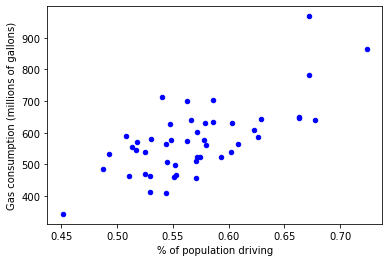

In [7]:
gas.plot(x='drivers', y='gas', kind='scatter', color='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions of gallons)');

We could try to draw a line describing the trend in the data, but which is the best one?

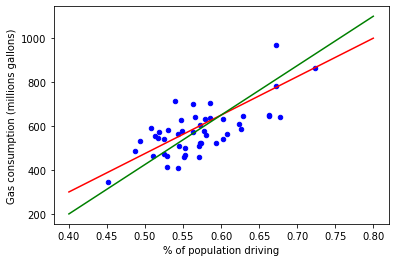

In [8]:
gas.plot(x='drivers', y='gas', kind='scatter', color='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

plt.plot([.4, .8], [300, 1000], 'r-')
plt.plot([.4, .8], [200, 1100], 'g-');

In order to compare the different trend lines we need to define a **metric** for how well they describe the actual data. The metric should reflect what we value about our trend line. We want our trend line to reliably predict a y-value given an x-value, so it would be reasonable to construct our metric based on the **error** between the trend line and the y-values.

$$ e_i = y_i - (\beta_0 + \beta_1x_i) $$

We want to make the total error as small as possible. Since sometimes the errors will be positive and some will be negative, if we add them together they might cancel out. We don't care if the error is positive or negative, we want the _absolute value_ to be small. Instead of minimizing the total error, we'll minimize the total squared error. Often we divide it by the number of data points, $n$, which is called the **mean squared error** (MSE).

$$ MSE = \frac{1}{n}\sum_i e_i^2 $$

Since $e_i$ depends on our model parameters $\beta_0$ and $\beta_1$, we can tweak our model (the trend line) until the MSE is minimized. In the language of machine learning, the MSE would be called the **cost function** or **loss function**. For different machine learning tasks, we will define different cost functions (or **objective functions/utility functions**, which we seek to maximize instead of minimize).

(50, 1)


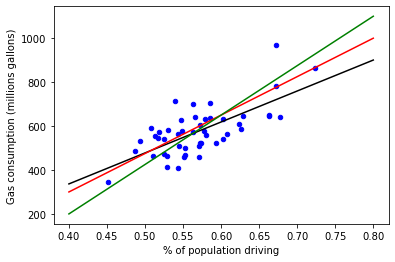

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(gas[['drivers']], gas['gas'])

gas.plot(x='drivers', y='gas', kind='scatter', color='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

x = np.linspace(.4, .8).reshape(-1, 1)
print(x.shape)
plt.plot(x, linreg.predict(x), 'k-')
plt.plot([.4, .8], [300, 1000], 'r-')
plt.plot([.4, .8], [200, 1100], 'g-');

In [10]:
(linreg.intercept_, linreg.coef_[0])

(-227.3091174945256, 1409.8421113288002)